<a href="https://colab.research.google.com/github/vale314/GLAMUR-IA/blob/main/GLAMUR04(SHORT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Realización de un modelo sencillo

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
import random

Cloning into 'ssp19ai_utils'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.
Already up to date.


In [2]:
# Import the data from keras.dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [15]:
# Son las 10 clases con las que contamos en el modelo
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# Normalize the input image so that each pixel value is between 0 to 1.

train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(train_images, train_labels, validation_split=0.25, epochs=5)

Epoch 1/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5163 - accuracy: 0.8199 - val_loss: 0.4225 - val_accuracy: 0.8495
Epoch 2/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3883 - accuracy: 0.8609 - val_loss: 0.3753 - val_accuracy: 0.8642
Epoch 3/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3455 - accuracy: 0.8740 - val_loss: 0.3878 - val_accuracy: 0.8603
Epoch 4/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3186 - accuracy: 0.8828 - val_loss: 0.3498 - val_accuracy: 0.8720
Epoch 5/5
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3002 - accuracy: 0.8897 - val_loss: 0.3315 - val_accuracy: 0.8813


In [11]:
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.


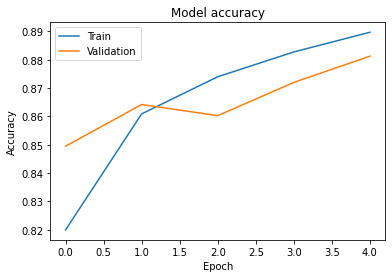

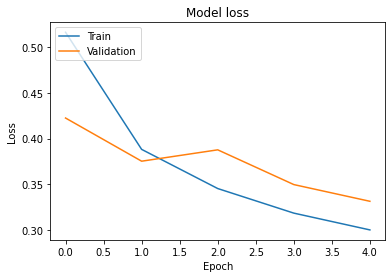

In [12]:
utils.plot_accuracy_and_loss(history)

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8718
Test accuracy: 0.8718000054359436


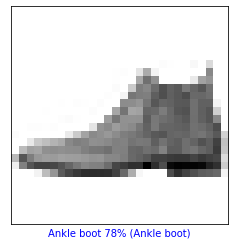

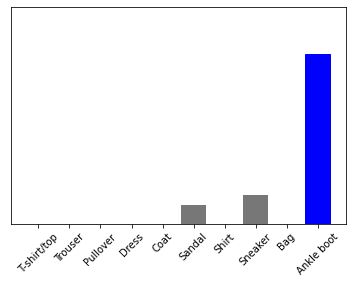

In [16]:
predictions = model.predict(test_images)
index = 0
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index, big=True, class_names=class_names)

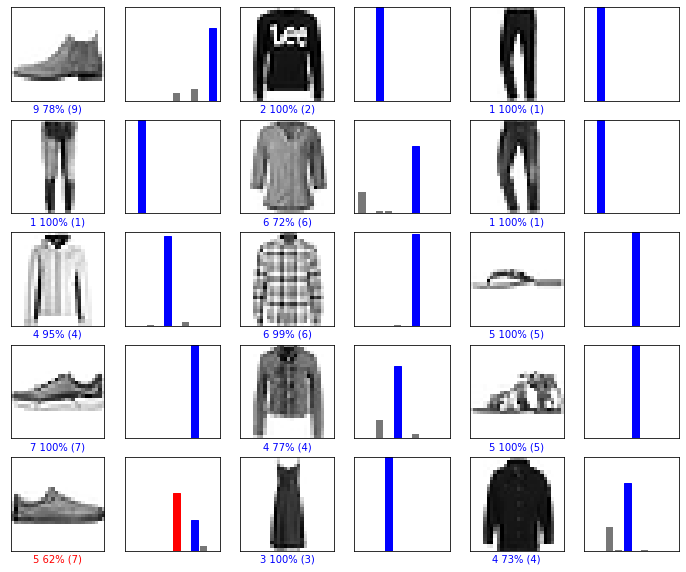

In [17]:
utils.plot_multi_images_prob(predictions, test_labels, test_images)

Confusion matrix


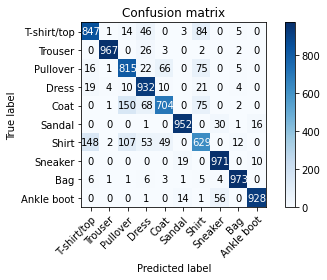

In [19]:
# Como siempre - vamos a convertir la matriz de probabilidades en clases
predicted_classes = utils.label_with_highest_prob(predictions)

# Graficar la matriz
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=test_labels, classes=np.array(class_names))

#Evaluamos dentro de un rango si evalua correctamente

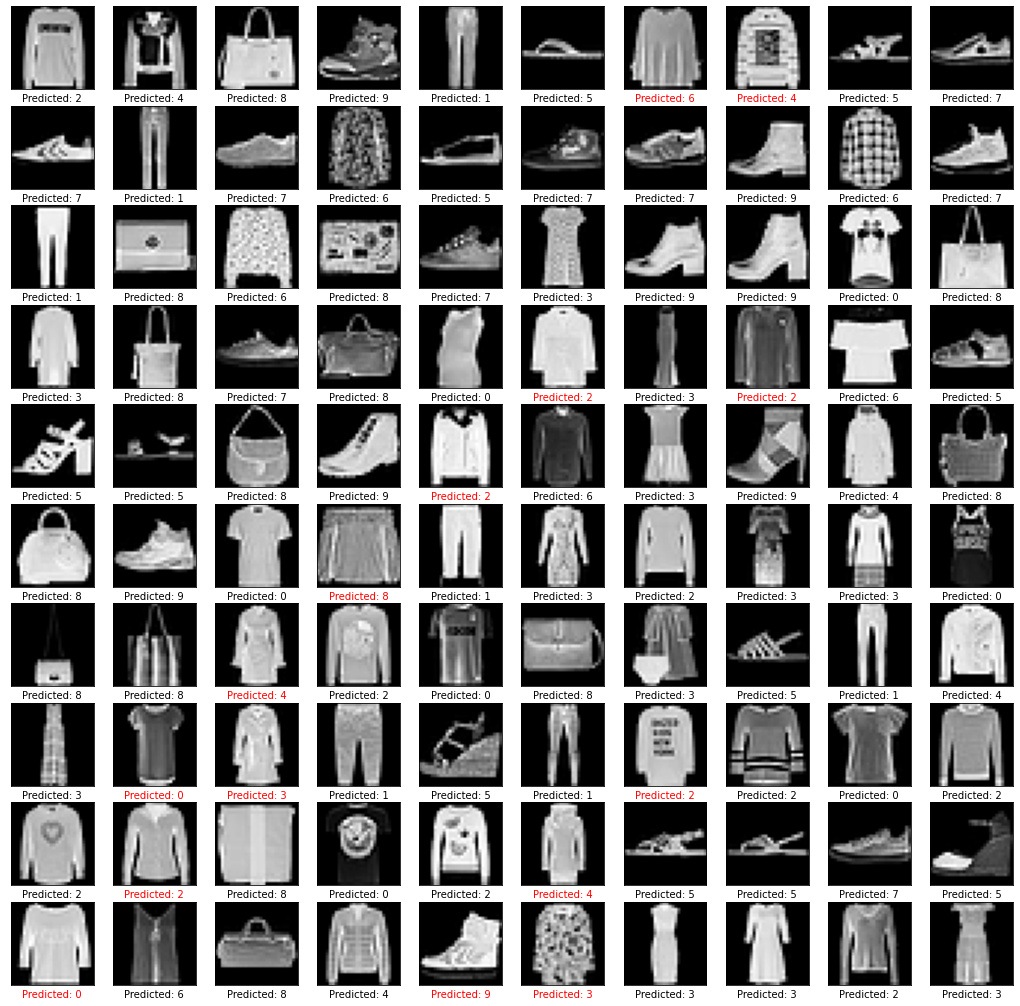

In [20]:
# Una función auxiliar que devuelve 'rojo'/'negro' dependiendo de si son dos entradas
# parámetro coincide o no.

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Prediga las etiquetas de las imágenes de dígitos en nuestro conjunto de datos de prueba.

predictions = model.predict(test_images)

# Como la salida del modelo, 10 flotantes que representan la probabilidad de la imagen de entrada
# siendo un dígito del 0 al 9, necesitamos encontrar el mayor valor de probabilidad
# para averiguar qué dígito predice el modelo como más probable en la imagen.

prediction_digits = np.argmax(predictions, axis=1)

# Luego trace 100 imágenes de prueba aleatorias y sus etiquetas predichas.
# Si el resultado de una predicción es diferente de la etiqueta proporcionada en "prueba"
# conjunto de datos, lo resaltaremos en color rojo.

plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()


#Utilizando el modelo con nuestros datos

In [21]:
from google.colab import files
uploaded = files.upload()

image_name = ""

for key in uploaded.keys():
  image_name = key;

# painting=plt.imread(image_name)
# print(painting.shape)

Saving 1.jpg to 1.jpg


In [22]:
from PIL import Image 
import PIL.ImageOps 
### Cambiamos a blanco y negro la imagen 1 capa
image_file = Image.open(image_name) 
image_file = image_file.convert('1')
image_file.save('result.jpg')

### Se invierten los colores
image = Image.open('result.jpg')
image_file = PIL.ImageOps.invert(image)
image_file.save('result.jpg')

### Se normaliza la imagen
painting=plt.imread("result.jpg")
datas = painting / 255.0

In [23]:
arr = np.array([datas, datas])

pre = model.predict(arr)

prediction_digits = np.argmax(pre, axis=1)

# print (prediction_digits[0])

print("Numero en clase: " + str(prediction_digits[0]) + "    Nombre de clase: " + str(class_names[prediction_digits[0]]))

Numero en clase: 8    Nombre de clase: Bag
